# Amazon Fine Food Reviews Analysis

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer

In [2]:
con = sqlite3.connect('./amazon-fine-food-reviews/database.sqlite')

In [3]:
type(con)

sqlite3.Connection

In [4]:
filtered_data = pd.read_sql_query("SELECT * FROM Reviews WHERE Score != 3",con)

In [5]:
def partition(x):
    if x< 3:
        return 'negative'
    else:
        return 'positive'

In [6]:
actual_Score = filtered_data['Score']

In [7]:
positiveNegative = actual_Score.map(partition)

In [8]:
filtered_data['Score']=positiveNegative

In [9]:
filtered_data.shape

(525814, 10)

In [10]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
display=pd.read_sql_query("Select * from Reviews where score != 3 and UserId='AR5J8UI46CURR' ORDER BY PRODUCTID",con)

In [12]:
display.shape

(5, 10)

In [13]:
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [14]:
sorted_data=filtered_data.sort_values("ProductId",axis=0,ascending=True,inplace=False,kind='quicksort',na_position = 'last')

In [15]:
final=sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},keep='first',inplace=False)

In [16]:
final.shape

(364173, 10)

In [17]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


In [18]:
display=pd.read_sql_query("Select * from Reviews where score != 3 and Id = 44737 or Id = 64422 order BY ProductId",con)
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [19]:
final = final[final.HelpfulnessNumerator <= final.HelpfulnessDenominator]

In [20]:
final.shape

(364171, 10)

In [21]:
final['Score'].value_counts() #Imbalanced Dataset

positive    307061
negative     57110
Name: Score, dtype: int64

In [22]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english'))

sno = nltk.stem.SnowballStemmer('english')

def cleanhtml(sentence):
    clean = re.compile('<.*?>')
    cleantext = re.sub(clean,'',sentence)
    return cleantext

def cleanpunc(sentence):
    cleaned = re.sub(r'[?|\'|"#]',r'',sentence)
    cleantext = re.sub(r'[.|,)|(|\|/)]',r'',cleaned)
    return cleaned 

print(stop)
print(sno.stem('TaSty'))


{'m', 'again', 'in', "she's", 'my', 'which', 'being', 'an', 'mightn', 'am', 'isn', 'themselves', 'each', 'before', 'most', 'weren', "wouldn't", 'both', 'above', 'did', 'ain', 'are', 'his', 'o', 'through', 'same', 'hers', "isn't", 'to', 'until', 'from', "mustn't", 'd', 'mustn', 'those', "shouldn't", 'if', 'ours', "haven't", 'on', 'herself', 'them', 'ma', 'needn', 'into', 're', 'should', "didn't", 'up', 'below', 'there', "hasn't", 'their', 'nor', 'haven', "mightn't", 'her', 'yours', "that'll", 'once', 'our', 'll', 'with', "couldn't", 'for', 'down', 'does', 'some', 'so', 'over', 'a', 'about', 'doesn', 'when', 'how', 'is', 'have', 'while', "weren't", 'few', 'i', 'theirs', 'has', 'out', 'shouldn', 'itself', 'can', 'more', 'only', 'hasn', 'under', 'by', 'and', 'aren', 'here', 'he', 't', 'such', 'ourselves', 'of', 'were', 'been', 've', 'couldn', 'myself', 'these', "needn't", 'had', 'during', 'wasn', "you're", 'him', 'why', "wasn't", 'yourselves', "you'd", 'we', 'against', 'then', 'do', 'furth

In [23]:
i=0
str1=''
final_string = []

all_positive_words=[]
all_negative_words=[]

s = ''
for sent in final['Text'].values:
    filtered_sentence=[]
    sent = cleanhtml(sent)
    for w in sent.split():  #str.split() with no arguments strips away all the whitespace. 
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if (cleaned_words.lower() not in stop):
                    s= (sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    
                    if(final['Score'].values)[i] == 'positive' :
                        all_positive_words.append(s)
                    
                    if(final['Score'].values)[i] == 'negative' :
                        all_negative_words.append(s)
                    else:
                        continue
                else:
                    continue
    str1 = b"".join(filtered_sentence)    
    final_string.append(str1)
    i=i+1            

In [24]:
final['CleanedText'] = final_string

In [25]:
#final.head(3)

In [26]:
conn = sqlite3.connect('final.sqlite')

In [27]:
c=conn.cursor()

In [28]:
conn.text_factory = str

In [29]:
final.to_sql('Reviews',conn,flavor = None,schema = None,if_exists='replace',index = True , index_label = None,chunksize = None,dtype =None)

# BOW

In [30]:
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(final['Text'].values)

In [31]:
final_counts.get_shape()

(364171, 115281)

In [32]:
target=final['Score']

In [33]:
features=final_counts[0:1000,:]

In [34]:
target=target[0:1000]

In [35]:
features=features.toarray()

In [36]:
type(features)

numpy.ndarray

In [37]:
import pandas as pd
features=pd.DataFrame(features)

In [38]:
#d=pd.DataFrame(final_counts.todense())

In [39]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,115271,115272,115273,115274,115275,115276,115277,115278,115279,115280
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
target.head()

138706    positive
138688    positive
138689    positive
138690    positive
138691    positive
Name: Score, dtype: object

In [41]:
target.shape

(1000,)

In [42]:
features.shape

(1000, 115281)

In [43]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,115271,115272,115273,115274,115275,115276,115277,115278,115279,115280
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
final_counts.shape

(364171, 115281)

In [50]:
final_counts[:1000]

<1000x115281 sparse matrix of type '<class 'numpy.int64'>'
	with 59467 stored elements in Compressed Sparse Row format>

In [51]:
target.shape

(1000,)

In [47]:
# from sklearn.preprocessing import StandardScaler
# features=StandardScaler().fit_transform(features)
# features.shape

(1000, 115281)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

tuned_parameters =  [{'n_estimators': [100,150,200,250,300],'max_depth':[2,3,4,5,6]}]
X_train, X_test, Y_train, Y_test = train_test_split(features, target, train_size=.9)


model = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)


print(model.best_estimator_)
print(model.score(X_test, Y_test))

C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



 The optimal number of neighbors is 5.


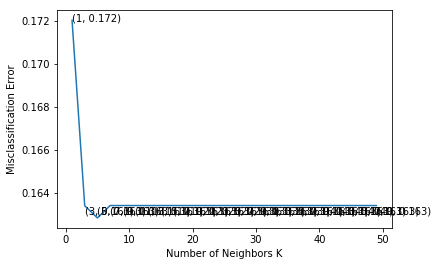

the misclassification error for each k value is :  [0.172 0.163 0.163 0.163 0.163 0.163 0.163 0.163 0.163 0.163 0.163 0.163
 0.163 0.163 0.163 0.163 0.163 0.163 0.163 0.163 0.163 0.163 0.163 0.163
 0.163]


In [46]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(features,target,test_size=0.3, random_state=0)

myList = list(range(1,100))
neighbors = list(filter(lambda x: x%2 !=0,myList))

cv_scores=[]

for k in neighbors:
    clf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(clf,X_train,Y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
#Changing to misclassification
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print("\n The optimal number of neighbors is %d."% optimal_k)


In [ ]:
clf_optimal =   RandomForestClassifier(n_estimators=optimal_models)

# fitting the model
clf_optimal.fit(X_train, y_train)

# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the  RandomForestClassifier for depth = %d is %f%%' % (optimal_models, acc))


 The accuracy of the knn classifier for k=5 is 81.466667%


# TF-IDF

In [45]:
tf_idf_vect = TfidfVectorizer() #unigram

In [46]:
final_tf_idf = tf_idf_vect.fit_transform(final['Text'].values)

In [47]:
final_tf_idf.get_shape()

(364171, 115281)

In [48]:
features = tf_idf_vect.get_feature_names()

In [49]:
tfidf_features=final_tf_idf[0:1000].toarray()

In [50]:
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],features,2500)

In [51]:
top_tfidf.shape

(2500, 2)

In [52]:
top_tfidf.head()

,feature,tfidf
0,paperbacks,0.341322
1,sendak,0.304084
2,rosie,0.298090
3,incorporates,0.272424
4,pages,0.249370


In [53]:
features=top_tfidf['tfidf']

In [54]:
features.head()

0    0.341322
1    0.304084
2    0.298090
3    0.272424
4    0.249370
Name: tfidf, dtype: float64

In [55]:
top_tfidf.head()

,feature,tfidf
0,paperbacks,0.341322
1,sendak,0.304084
2,rosie,0.298090
3,incorporates,0.272424
4,pages,0.249370


In [62]:
# from sklearn.preprocessing import StandardScaler
# features = StandardScaler().fit_transform(tfidf_features)

In [63]:
import pandas as pd
features=pd.DataFrame(features)


 The optimal number of neighbors is 3.


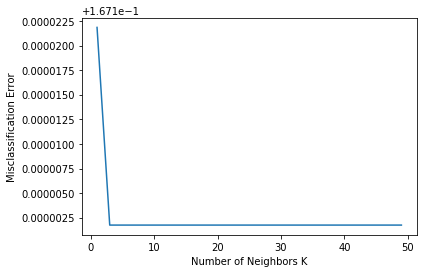

the misclassification error for each k value is :  [0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167
 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167
 0.167]


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

tuned_parameters =  [{'n_estimators': [100,150,200,250,300],'max_depth':[2,3,4,5,6]}]
X_train, X_test, Y_train, Y_test = train_test_split(features, target, train_size=.9)


model = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)


print(model.best_estimator_)
print(model.score(X_test, Y_test))

In [65]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(features,target,test_size=0.3, random_state=0)

myList = list(range(1,100))
neighbors = list(filter(lambda x: x%2 !=0,myList))

cv_scores=[]

for k in neighbors:
    clf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(clf,X_train,Y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
#Changing to misclassification
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print("\n The optimal number of neighbors is %d."% optimal_k)



 The accuracy of the knn classifier for k=3 is 82.666667%



 The optimal number of neighbors is 3.


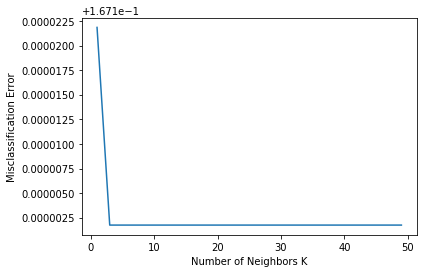

the misclassification error for each k value is :  [0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167
 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167 0.167
 0.167]


In [66]:
clf_optimal =   RandomForestClassifier(n_estimators=optimal_models)

# fitting the model
clf_optimal.fit(X_train, y_train)

# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the  RandomForestClassifier for depth = %d is %f%%' % (optimal_models, acc))

# Word2vec

In [56]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

C:\Users\karti\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [57]:
import gensim
i=0
list_of_sent=[]
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [58]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)      

In [ ]:
words = list(w2v_model.wv.vocab)
print(len(words))

29950


In [ ]:
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(final['Text'].values)

In [ ]:
count_vect_feat = count_vect.get_feature_names() # list of words in the BoW
count_vect_feat.index('like')
print(count_vect_feat[64055])

# Avg W2V.TFIDF-W2V

In [ ]:
#import numpy as np
#np.seterr(divide='ignore', invalid='ignore')

In [ ]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

In [ ]:
type(sent_vectors)

In [ ]:
from sklearn.preprocessing import Imputer

trainDataVecs = Imputer().fit_transform(sent_vectors)

In [ ]:
a=np.array(trainDataVecs)

In [ ]:
avgw2v=pd.DataFrame(a)

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(a)

In [ ]:
standardized_data.shape

In [ ]:
features=standardized_data[:1000]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

tuned_parameters =  [{'n_estimators': [100,150,200,250,300],'max_depth':[2,3,4,5,6]}]
X_train, X_test, Y_train, Y_test = train_test_split(features, target, train_size=.9)


model = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)


print(model.best_estimator_)
print(model.score(X_test, Y_test))

In [ ]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(features,target,test_size=0.3, random_state=0)

myList = list(range(1,100))
neighbors = list(filter(lambda x: x%2 !=0,myList))

cv_scores=[]

for k in neighbors:
    clf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(clf,X_train,Y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
#Changing to misclassification
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print("\n The optimal number of neighbors is %d."% optimal_k)


In [ ]:
clf_optimal =   RandomForestClassifier(n_estimators=optimal_models)

# fitting the model
clf_optimal.fit(X_train, y_train)

# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the  RandomForestClassifier for depth = %d is %f%%' % (optimal_models, acc))

In [ ]:
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [ ]:
type(tfidf_sent_vectors)

In [ ]:
a=np.array(tfidf_sent_vectors)

In [ ]:
avgtfidf=pd.DataFrame(a)

In [ ]:
avgtfidf.head()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# standardized_data = StandardScaler().fit_transform(avgtfidf)
# standardized_data.shape

In [ ]:
# features=standardized_data[:1000]

In [ ]:
features=avgtfidf[ :1000]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

tuned_parameters =  [{'n_estimators': [100,150,200,250,300],'max_depth':[2,3,4,5,6]}]
X_train, X_test, Y_train, Y_test = train_test_split(features, target, train_size=.9)


model = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)


print(model.best_estimator_)
print(model.score(X_test, Y_test))

In [ ]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(features,target,test_size=0.3, random_state=0)

myList = list(range(1,100))
neighbors = list(filter(lambda x: x%2 !=0,myList))

cv_scores=[]

for k in neighbors:
    clf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(clf,X_train,Y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
#Changing to misclassification
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print("\n The optimal number of neighbors is %d."% optimal_k)


In [ ]:
clf_optimal =   RandomForestClassifier(n_estimators=optimal_models)

# fitting the model
clf_optimal.fit(X_train, y_train)

# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the  RandomForestClassifier for depth = %d is %f%%' % (optimal_models, acc))